# Lab 10, Supervised Learning, part 2 
 

In class Tuesday, you had the opportunity to learn about additional classification models and methods to assist with Model Evaluation: 

* Exposure to the [Scikit-learn toolbox](https://scikit-learn.org/stable/index.html)
* Decision Trees
* Learning Curves 
* Support Vector Machines 
* Model Evaluation

In the previous lab, we looked at KNN, performance metrics, and confusion matrix. 

In this lab session, we will look at the following: 

* Scikit learning methods and useful functions
* Decision Trees
* Support Vector Machines 

Useful Links: http://scikit-learn.org/stable/index.html

## Lab Setup

Perform the following steps:
* Import library numpy, matplotlib, 
* Import from scikit-learn the datasets, neighbors, metrics, model selection libraries
* Load cancer dataset using sklearn datasets and assign to "cancer"
* Look into the various attributes of the cancer dataset: attribute names, target classes, size of data 

In [19]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# import math and random modules
import math, random

import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm

import re
import os
if re.search(r'amzn', os.uname().release): 
    GS = True
else: 
    GS = False

import otter
grader = otter.Notebook()


cancer = load_breast_cancer()

In [20]:
print(cancer.data.shape)
print(cancer.target_names)
# print(cancer.DESCR)
print('cancer dataset features:', cancer.feature_names)

(569, 30)
['malignant' 'benign']
cancer dataset features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Helper Methods to Visualize Classification Results

Here are two methods to help visualize the decision boundary of classification models. 

In [21]:
# """ Decision boundary plotting function from Hands-On Machine Learning with Scikit-Learn
# and TensorFlow """

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
    
# Function adapted from source: 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X
               [:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Review KNN and model fitting



##  Ex. 1A. Visualize Performance vs. Complexity 

Create and explore a visualization for when number of neighbors in KNN is changed from 1 to 30

Use the following procedure:

* Split the data into training (70%) and testing (30%)
    * To maintain consistency among students, let's use random state of 65, make sure to use the `stratify` parameter
* Use a for loop to explore the number of neighbors parameters 
    * Inside the loop, you will have to build the knn, train the model, use the model to predict values for the training and testing data, and then compute the accuracy on both the train and test sets 
    * The training and testing accuracy for each neighbor (iteration) can be stored in an array
* Plot the training and testing accuracy versus the number of neighbors 

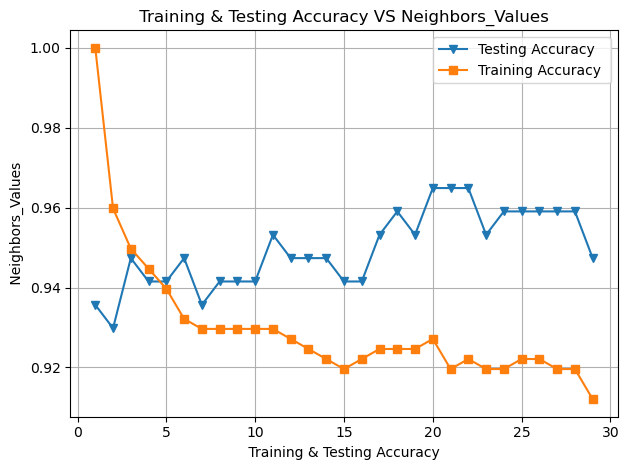

In [22]:


X = cancer.data 
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 65, stratify = y)

train_acc = []
test_acc = []
neighbors_values = range(1,30)

for k in neighbors_values:

    # specify the knn model 
    clf = KNeighborsClassifier(n_neighbors = k)
    
    # fit the model 
    clf.fit(X_train,y_train)
    
    # make predictions with the model 
    yhat_test = clf.predict(X_test)
    yhat_train = clf.predict(X_train)
    
    # evaluate predictions - accuracy
    test_acc.append(accuracy_score( y_test, yhat_test))
    train_acc.append(accuracy_score( y_train, yhat_train))
    

# Plot training and testing accuracy versus the number of neighbors
plt.plot(neighbors_values, test_acc,marker = 'v', label =  'Testing Accuracy')
plt.plot(neighbors_values,train_acc,marker = 's',label = 'Training Accuracy ')
plt.title(" Training & Testing Accuracy VS Neighbors_Values ")
plt.ylabel(" Neighbors_Values ")
plt.xlabel(" Training & Testing Accuracy ")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [23]:
grader.check("q1a")

q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

## Ex 1B.  `score` 

Look at the `score` function for KNN:  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Describe how you can simplify your code above by making use of the `score` function. 

**Ex 1B - Answer**

The `score` function returns the the mean accuracy on the given test data and labels.

Therefore the lines: 
```
accuracy_score( y_test, yhat_test)
accuracy_score( y_train, yhat_train)
...
``` 
can be condensed to: 
```
clf.score( X_train, y_train)
clf.score( X_test, y_test)
...
```

<!-- END QUESTION -->

# Support Vector Machines 

Some of the different kernels that can be accessed by Scikit learn are listed below. 
* Linear 
* Gaussian 
* Exponential
* Polynomial 
* hybrid
* Sigmoidal

Read the below reference for accessing kernels in scikit learn
http://scikit-learn.org/stable/modules/svm.html#svm-kernels

We will use Linear, Gaussian and polynominal for current dataset problem.



Let's consider only the first two features of the breast cancer data set for classification, i.e., mean radius and mean texture.  This allows us to plot the features and labels in a 2D plot. 


In [24]:
# Take mean radius and mean texture for cancer classification data, 
#  assign to "X" and cancer target names to "y"

X = cancer.data[:, :2]
y = cancer.target

<!-- BEGIN QUESTION -->

### Ex 2A. Linear Kernel 

Train an SVM model with the "linear Kernel" and observe what happens with different value of C-cost. 

Total duration of fitting: 0.005505 s


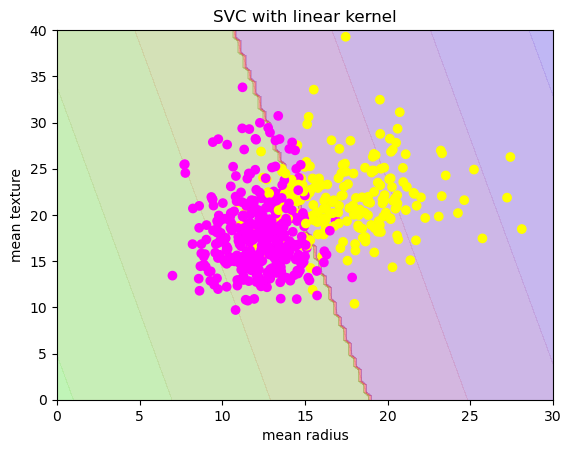

In [25]:
# Explore training an svm with a linear kernel 
t1 = time.time()
# define the svm model and its hyperparameters: kernel, C
#  plug-in different values for C and observe the differences
#  values for C = [10^-2, 10^-1, 1, 10, 100]
svc = svm.SVC(kernel = 'linear', C = 1)
svc.fit(X,y)   # fit the model 
t2 = time.time()
print("Total duration of fitting: {0:.6f} s".format(t2-t1))


# Visualize the decision surface 
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with linear kernel');

Describe what happens when you change the values of C, in terms of: 

* time to train 
* decision surface learned 



**ANSWER**  

*   Larger C values will take more time to train, smaller C values will take less time to train.  
*   A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Ex 2B. RBF Kernel 

Train an SVM model with the "rbf kernel" and observe what happens with different values of C-cost and gamma.  

Total duration of fitting: 0.007323 s


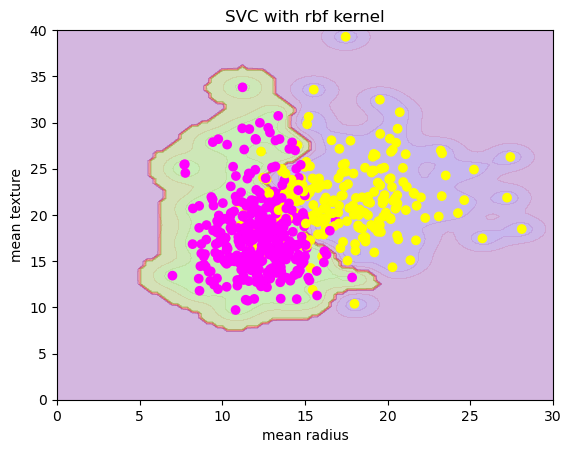

In [26]:
# Explore training an svm with a rbf kernel  
t1 = time.time()
# define the svm model and its hyperparameters: kernel, C, gamma
#  values for C = [10^-2, 10^-1, 1, 10, 100]
#  values for gamma = [0.01, 0.1, 0.5]
# Then, fit the model 
svc = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.5)
svc.fit(X,y) 
t2 = time.time()
print("Total duration of fitting: {0:.6f} s".format(t2-t1))


# See the decision surface 
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with rbf kernel');

Describe what happens when you change the values of C and gamma. In terms of: 

* time 
* decision surface 


**ANSWER**

* Larger C values will take more time to train smaller C values will take less time to train. 

* A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.

* Larger gamma values will take more time to train smaller gamma values will take less time to train.

* A low gamma makes the model too constrained and it can not capture the shape of the data, A larger gamma value means more localized decision surface it will create complex model.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Ex 2C. Polynomial Kernel 

- Similar to linear kernel, train the svc for poly kernel and visualize the results.  
- Check what parameters are useful for this [kernel](https://scikit-learn.org/stable/modules/svm.html#svm-kernels).
    * set coef0 = 1
- Consider different degrees starting from 1 to 4, and different cost values C
- There might be a case, where the notebook takes almost impossible time to train. In this case, you may need to interrupt the Kernel. 

Total duration of fitting: 0.003215 s


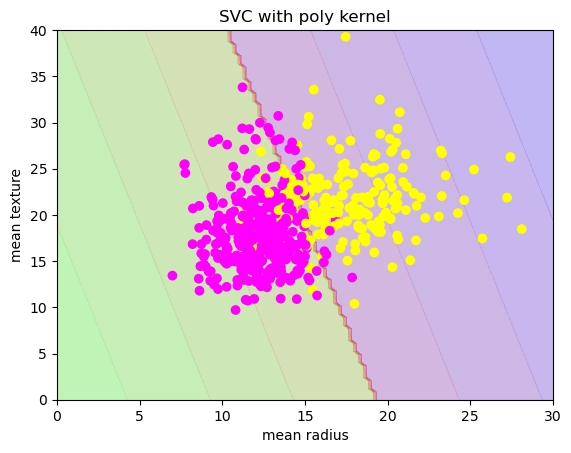

In [27]:
# Explore training an svm with a polynomial kernel  
t1 = time.time()
# define the svm model and its hyperparameters: C, degree
#  values for C = [10^-2, 10^-1, 1, 10]
#  values for degree = [1, 2, 3, 4]
# Then, fit the model 
svc = svm.SVC( kernel = 'poly', C = 1,degree = 1,coef0 = 1)
svc.fit(X,y)
t2 = time.time()
print("Total duration of fitting: {0:.6f} s".format(t2-t1))


# See the decision surface 
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with poly kernel');

Questions and Observations: 

1. What do you observe as you increase the degree of the polynomial (with respect to the plot and time for computation)? 
  * As the polynomial degree increases, the time for training the model typically increases, the decision boundary becomes more flexible and can fit the training data more closely.
2. Compare what happens when d=1 or use the linear kernel
  * This will create linear boundary and it is less flexible compared to higher-degree polynomials. It may not capture complex patterns in the data as effectively and computational time required will be less.

<!-- END QUESTION -->

# Decision Trees

<!-- BEGIN QUESTION -->

## Ex3. DT hyperparameters 

- Lets visualize the DT based classifiers and dataset similar to what was done above for the SVMs
- This time use the function `visualize_classifier()`, to visualize the DT classification and scatter plots of data
- The data used to train the model should be the entire cancer data set limited to only two features (column index 22 and 27)

Example: 
`visualize_classifier(classifier, iris.data[:, :2], iris.target)`

Visualize the DT classifier for different values of the hyperparameter *maximum depth*, which specifies the maximum depth of the tree.  

You will look at the visualiztions for maximum depths of 1, 2, 3, and 6.  

In [28]:
# Setup data for using column 22, and 27 of the original data
X = cancer.data[:, (22, 27)]
y = cancer.target

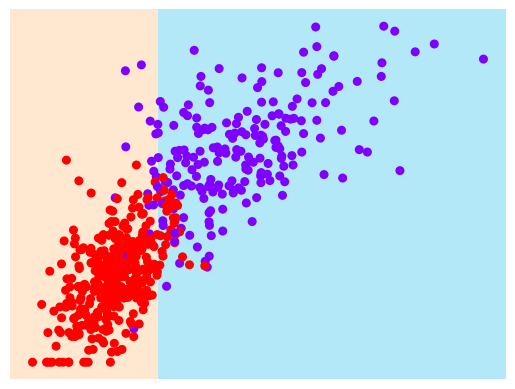

In [29]:

# select a decision tree classifier with hyperparameter of the 
#   maximum depth of 1 
dt1 = DecisionTreeClassifier(max_depth=1)
visualize_classifier(dt1, X, y)


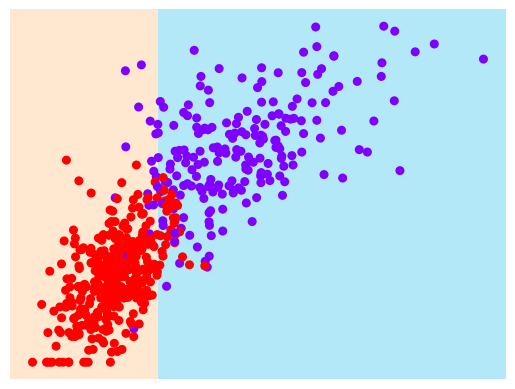

In [30]:

# select a decision tree classifier with hyperparameter of the 
#   maximum depth of 2 
dt2 = DecisionTreeClassifier(max_depth=2)
visualize_classifier(dt1, X, y)


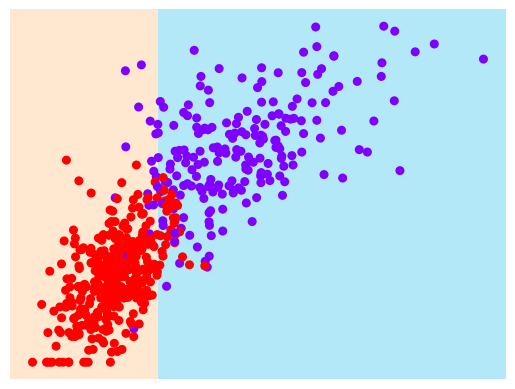

In [31]:

# select a decision tree classifier with hyperparameter of the 
#   maximum depth of 3 
dt3 = DecisionTreeClassifier(max_depth = 3)
visualize_classifier(dt1, X, y)


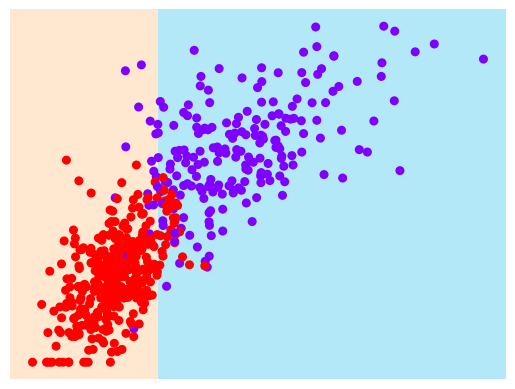

In [32]:

# select a decision tree classifier with hyperparameter of the 
#   maximum depth of 6 
dt6 = DecisionTreeClassifier(max_depth = 6)
visualize_classifier(dt1, X, y)


<!-- END QUESTION -->

# Model Selection and Evaluation

## Ex4A. DT tune hyperparameters  

Find the best hyperparameters of a Decision Tree classifier using GridSearcCV 
* First, split the data into the train_val and test sets with a 80/20 split of the cancer data set, random_state is 5, and make sure use the stratify option.  
* For the Decision Tree, set up the hyperparameter options to: consider two different hyperparameters: 
    * Maximum depth of the tree:  four different levels = 1, 3, 5, 10
    * Splitting criterion:  'gini' or 'entropy'
* Instantiate the GridSearcCV meta-estimator 
    * Set the decision tree with an option with the random state to 5
    * Use 5-fold c.v. with accuracy as the metric to evaluate models
* Fit the meta-estimator

* Print out: 
    * the best mean cross-validation accuracy,  
    * the best hyperparameters 
    * the accuracy on the test set of the retrained model with the best hyperparameters.

In [33]:
# from sklearn.model_selection import GridSearchCV

X = cancer.data
y = cancer.target

# Split of the test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y , train_size = 0.8, test_size = 0.2, random_state = 5, stratify = y)

# define the hyperparameter grid 
param_grid = {'max_depth': [1,3,5,10], 'criterion': ['gini','entropy']}

# Instantiate GridSearchCV 
grid = GridSearchCV(DecisionTreeClassifier(random_state = 5), param_grid,  cv = 5 ,scoring = 'accuracy')

# Execute the search (and retrain the final model)
grid.fit(X_trainval, y_trainval)

# print out best hyperparameters
print(f"best mean cross-validation acc score: {grid.best_score_}")
print(f"best hyperparameters: {grid.best_params_}")

# do a final evaluation of retrained model on the test set
test_acc = grid.score(X_test, y_test)
print(f"test-set acc score: {test_acc}")


best mean cross-validation acc score: 0.9428571428571428
best hyperparameters: {'criterion': 'gini', 'max_depth': 10}
test-set acc score: 0.9210526315789473


In [34]:
grader.check("q4a")

q4a results: All test cases passed!

## Ex4B. SVM - tune hyperparameters

Find the best hyperparameters for a SVM classifier on the cancer data set using GridSearcCV 
* First, split the data into the train_val and test sets with a 80/20 split of the cancer data set, random_state is 5, and make sure use the stratify option.  
* For the SVM, consider four different hyperparameters: 
    * kernel: polynomial and rbf 
    * degree: (specify degree of the polynomial kernel) 1, 2, 3
    * C: (cost penalty) 0.01, 0.1, 1
* Use 5-fold c.v.
    * Use f1-score to select the best model hyperparameters. 

* Print out: 
    * the best mean cross-validation f1-score,  
    * the best hyperparameters 
    * the f1-score on the test set of the retrained model with the best hyperparameters.

In [35]:
# from sklearn.model_selection import GridSearchCV

X = cancer.data
y = cancer.target

# Split of the test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y , train_size = 0.8, test_size = 0.2, random_state = 5, stratify = y)

# define the hyperparameter grid 
param_grid_4b = {'kernel': ['poly', 'rbf'], 'degree': [1,2,3], 'C' : [0.01,0.1,1,10]}

# Instantiate GridSearchCV 
grid4b = GridSearchCV(svm.SVC(), param_grid = param_grid_4b,  cv = 5 ,scoring = 'f1')

# Execute the search (and retrain the final model) 
grid4b.fit(X_trainval, y_trainval)

# print out best hyperparameters
print(f"best mean cross-validation f1 score: {grid4b.best_score_}")
print(f"best hyperparameters: {grid4b.best_params_}")

# do a final evaluation of retrained model on the test set 
f1_test = grid4b.score(X_test, y_test)
print(f"test-set f1 score: {f1_test}")



best mean cross-validation f1 score: 0.9417938166009414
best hyperparameters: {'C': 10, 'degree': 3, 'kernel': 'poly'}
test-set f1 score: 0.9403973509933775


In [36]:
grader.check("q4b")

q4b results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [37]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q4a results: All test cases passed!

    q4b results: All test cases passed!
